# Different result
https://www.kaggle.com/code/sunaysawant/air-passengers-time-series-arima/notebook

In [9]:
import numpy as np
import pmdarima as pm
from pmdarima import model_selection
from pmdarima import datasets
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection
from sklearn.metrics import mean_absolute_error
from statistics import mean 
from matplotlib import pyplot as plt

In [2]:
data = datasets.load_airpassengers()

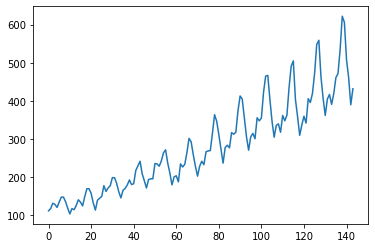

In [3]:
plt.plot(data)

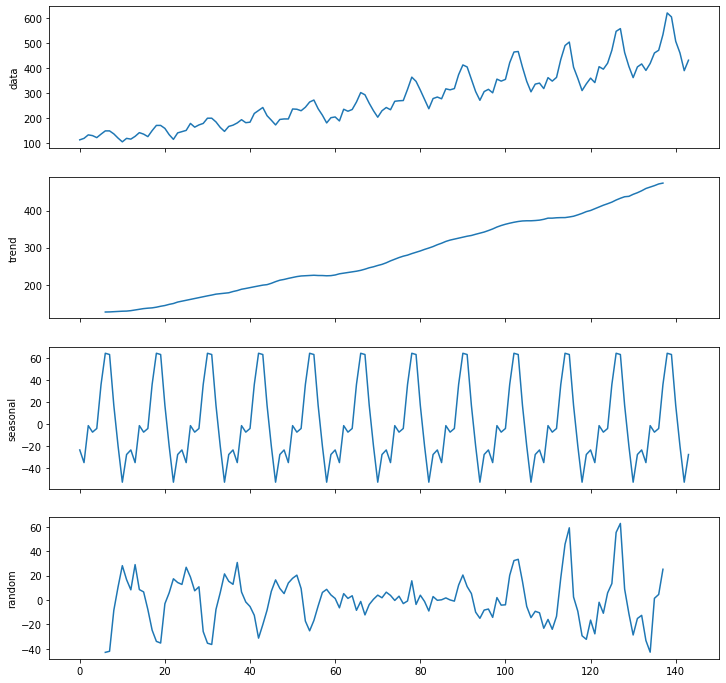

In [4]:
utils.decomposed_plot(arima.decompose(data, "additive", m=12), figure_kwargs={"figsize":(12, 12)})

/opt/conda/lib/python3.9/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


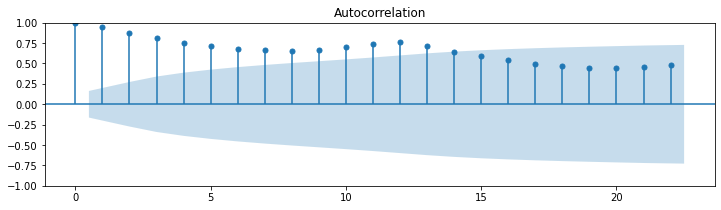

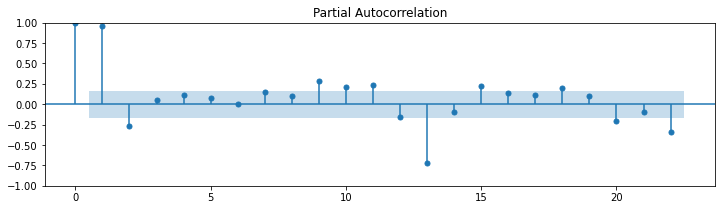

In [5]:
plt.rcParams['figure.figsize'] = [12, 3]
# 自己相関と偏自己相関
utils.plot_acf(data, alpha=.05)
utils.plot_pacf(data, alpha=.05)


In [6]:
train, test = model_selection.train_test_split(data, train_size=132)

In [7]:
arima_model = pm.auto_arima(train, 
                            seasonal=False,
                            trace=True,
                            n_jobs=-1,
                            maxiter=10)

/opt/conda/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1234.389, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.757, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1276.259, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1245.428, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1236.120, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1235.677, Time=0.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1259.029, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1259.227, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1243.694, Time=0.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1255.260, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1235.327, Time=0.06 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

MAE:
58.914077554049264
MAPE(%):
11.738724869769447


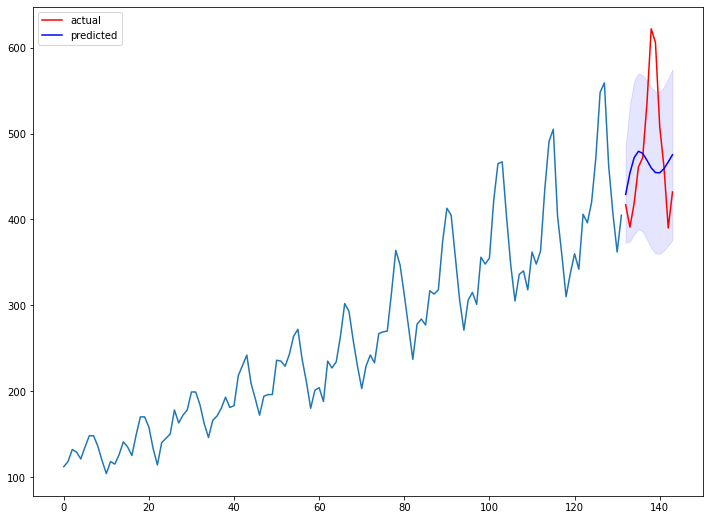

In [10]:
# グラフのサイズ変更
plt.rcParams['figure.figsize'] = [12, 9]
# 予測
preds, conf_int = arima_model.predict(n_periods=test.shape[0], 
                                      return_conf_int=True)
# 予測精度
print('MAE:')
print(mean_absolute_error(test, preds)) 
print('MAPE(%):')
print(mean(abs(test - preds)/test) *100)
# 予測と実測の比較（グラフ）
x_axis = np.arange(len(train), len(train) + preds.shape[0])
plt.plot(train)
plt.plot(x_axis,test,label="actual",color='r') 
plt.plot(x_axis,preds,label="predicted",color='b')
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.legend()
plt.show()

In [15]:
arima_model = pm.auto_arima(train, 
                            seasonal=True,
                            m=12,
                            d=0,
                            trace=True,
                            n_jobs=-1,
                            maxiter=10)

/opt/conda/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=911.913, Time=0.51 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.865, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.556, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.723, Time=0.65 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=909.369, Time=0.33 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.124, Time=0.24 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=911.772, Time=0.67 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.870, Time=0.21 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.478, Time=0.35 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.11 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.717, Time=0.28 sec
 ARIMA(2,0,0)(1,1,1)[12] inter

MAE:
14.898208317448123
MAPE(%):
3.0975615303185338


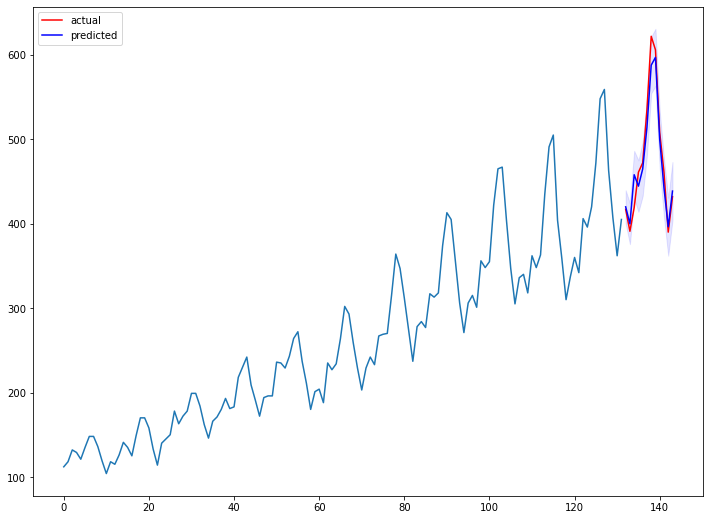

In [16]:
# グラフのサイズ変更
plt.rcParams['figure.figsize'] = [12, 9]
# 予測
preds, conf_int = arima_model.predict(n_periods=test.shape[0], 
                                      return_conf_int=True)
# 予測精度
print('MAE:')
print(mean_absolute_error(test, preds)) 
print('MAPE(%):')
print(mean(abs(test - preds)/test) *100)
# 予測と実測の比較（グラフ）
x_axis = np.arange(len(train), len(train) + preds.shape[0])
plt.plot(train)
plt.plot(x_axis,test,label="actual",color='r') 
plt.plot(x_axis,preds,label="predicted",color='b')
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.legend()
plt.show()